# Chaining PCA and Logistic Regression 

### This notebook chains PCA and logistic regression. The PCA does an unsupervised dimensionality reduction, while the logistic regression does the prediction.

In [40]:
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from pathway_forte.constants import *
from pathway_forte.logistic_regression import *

warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
HERE = os.path.realpath('__file__')
NOTEBOOKS = os.path.abspath(os.path.join(HERE, os.pardir))
DATA = os.path.join(os.path.abspath(os.path.join(NOTEBOOKS, os.pardir)), 'data')

PHENOTYPE_CLASSES = os.path.join(DATA, 'brca_dataset', 'phenotype_classes.cls')

KEGG_SSGSEA_NES = os.path.join(KEGG_SSGSEA,'gseapy.samples.normalized.es.txt')
REACTOME_SSGSEA_NES = os.path.join(REACTOME_SSGSEA,'gseapy.samples.normalized.es.txt')
WIKIPATHWAYS_SSGSEA_NES = os.path.join(WIKIPATHWAYS_SSGSEA,'gseapy.samples.normalized.es.txt')
#MERGED_SSGSEA_NES = os.path.join(MERGED_SSGSEA,'gseapy.samples.normalized.es.txt')

In [4]:
test_sizes = [
    i / 10
    for i in range(1, 10, 1)
]

In [5]:
def plot_metrics(log_data, log_data_with_pca, test_sizes_list, dataset, permutation=False):
    
    fig, (lax, rax) = plt.subplots(1, 2, figsize=(20, 7), dpi=140, sharey=True)
    
    if permutation:        
        fig.suptitle(f'Metric Scores for {dataset} with randomized labels', fontsize=24)
    else:        
        fig.suptitle(f'Metric Scores for {dataset} ', fontsize=24)
    ax = plt.gca()

    """Figure a)"""
    for i, (k, v) in enumerate(log_data.items()):
        lax.plot(test_sizes_list, v, '.-', label=k,  alpha=0.7)

    # Labels
    if permutation:
        lax.set_title('A) Logistic regression with shuffled labels', fontsize=18, pad=18)
    else:
        lax.set_title('A) Logistic regression', fontsize=18, pad=18)
        
    lax.set_xlabel("Proportion of dataset for testing", fontsize=18, labelpad=18)
    lax.set_ylabel("Score", fontsize=18, labelpad=18)
    # lax.set_ylim(0, 1.05)
    lax.tick_params(axis='x', labelsize=16)
    lax.tick_params(axis='y', labelsize=16)
    lax.legend(prop={'size': 16})

    """Figure b)"""
    for i, (k, v) in enumerate(log_data_with_pca.items()):
        rax.plot(test_sizes_list, v, '.-', label=k,  alpha=0.7)

    # Labels
    if permutation:
        rax.set_title('A) Logistic regression after PCA with shuffled labels', fontsize=18, pad=18)
    else:
        rax.set_title('B) Logistic regression after PCA transformation', fontsize=18, pad=18)
    
    rax.set_xlabel("Proportion of dataset for testing", fontsize=18, labelpad=18)
    rax.set_ylabel("Score", fontsize=18, labelpad=18)
    # rax.set_ylim(0, 1.05)
    rax.tick_params(axis='x', labelsize=16)
    rax.tick_params(axis='y', labelsize=16)
    rax.legend(prop={'size': 16})

### Run logistic regression for a range of test sizes for KEGG, Reactome, WikiPathways and merged datasets' ssGSEA normalized enrichment scores

Run logistic regression without PCA transformation

In [6]:
kegg_log_reg = log_reg(KEGG_SSGSEA_NES, test_sizes)

In [7]:
reactome_log_reg = log_reg(REACTOME_SSGSEA_NES, test_sizes)

In [8]:
wikipathways_log_reg = log_reg(WIKIPATHWAYS_SSGSEA_NES, test_sizes)

In [9]:
#merged_log_reg = log_reg(MERGED_SSGSEA_NES, test_sizes)

Run logistic regression after PCA tranformation

In [10]:
kegg_pca_log_reg = log_reg(KEGG_SSGSEA_NES, test_sizes, chain_pca=True)

In [11]:
reactome_pca_log_reg = log_reg(REACTOME_SSGSEA_NES, test_sizes, chain_pca=True)

In [12]:
wikipathways_pca_log_reg = log_reg(WIKIPATHWAYS_SSGSEA_NES, test_sizes, chain_pca=True)

In [13]:
#merged_pca_log_reg = log_reg(MERGED_SSGSEA_NES, test_sizes, chain_pca=True)

#### As the number of cases far exceeds the number of controls, the labels of the participants are shuffled in order to inject randomness into the datasets. The results are then compared to the original dataset to assess the performance of the logistic regression.

Run logistic regression without PCA and with shuffled labels 

In [14]:
kegg_permutate_log_reg = log_reg(KEGG_SSGSEA_NES, test_sizes, chain_pca=False, permutation=True)

In [15]:
reactome_permutate_log_reg = log_reg(REACTOME_SSGSEA_NES, test_sizes, chain_pca=False, permutation=True)

In [16]:
wikipathways_permutate_log_reg = log_reg(WIKIPATHWAYS_SSGSEA_NES, test_sizes, chain_pca=False, permutation=True)

In [17]:
#merged_permutate_log_reg = log_reg(MERGED_SSGSEA_NES, test_sizes, chain_pca=False, permutation=True)

Run logistic regression with PCA and with shuffled labels to inject randomness into datasets 

In [18]:
kegg_permutate_pca_log_reg = log_reg(KEGG_SSGSEA_NES, test_sizes, chain_pca=True, permutation=True)

In [19]:
reactome_permutate_pca_log_reg = log_reg(REACTOME_SSGSEA_NES, test_sizes, chain_pca=True, permutation=True)

In [20]:
wikipathways_permutate_pca_log_reg = log_reg(WIKIPATHWAYS_SSGSEA_NES, test_sizes, chain_pca=True, permutation=True)

In [21]:
#merged_permutate_pca_log_reg = log_reg(MERGED_SSGSEA_NES, test_sizes, chain_pca=True, permutation=True)

### Plot classification metrics

In [22]:
kegg_cnf_mat, kegg_scores, kegg_fpr, kegg_tpr, kegg_auc = predict_labels_pca_log_reg(
    KEGG_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95
)
# Chain PCA
kegg_pca_cnf_mat, kegg_pca_scores, kegg_pca_fpr, kegg_pca_tpr, kegg_pca_auc = predict_labels_pca_log_reg(
    KEGG_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95
)
# Permutate labels
kegg_cnf_mat_permutate, kegg_scores_permutate, kegg_fpr_permutate, kegg_tpr_permutate, kegg_auc_permutate = predict_labels_pca_log_reg(
    KEGG_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95,
    permutation=True
)
# Chain PCA and permutate labels
kegg_pca_cnf_mat_permutate, kegg_pca_scores_permutate, kegg_pca_fpr_permutate, kegg_pca_tpr_permutate, kegg_pca_auc_permutate = predict_labels_pca_log_reg(
    KEGG_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95,
    permutation=True
)

In [23]:
reactome_cnf_mat, reactome_scores, reactome_fpr, reactome_tpr, reactome_auc = predict_labels_pca_log_reg(
    REACTOME_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95
)
# Chain PCA
reactome_pca_cnf_mat, reactome_pca_scores, reactome_pca_fpr, reactome_pca_tpr, reactome_pca_auc = predict_labels_pca_log_reg(
    REACTOME_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95
)
# Permutate labels
reactome_cnf_mat_permutate, reactome_scores_permutate, reactome_fpr_permutate, reactome_tpr_permutate, reactome_auc_permutate = predict_labels_pca_log_reg(
    REACTOME_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95,
    permutation=True
)
# Chain PCA and permutate labels
reactome_pca_cnf_mat_permutate, reactome_pca_scores_permutate, reactome_pca_fpr_permutate, reactome_pca_tpr_permutate, reactome_pca_auc_permutate = predict_labels_pca_log_reg(
    REACTOME_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95,
    permutation=True
)

In [24]:
wikipathways_cnf_mat, wikipathways_scores, wikipathways_fpr, wikipathways_tpr, wikipathways_auc = predict_labels_pca_log_reg(
    WIKIPATHWAYS_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95
)
# Chain PCA
wikipathways_pca_cnf_mat, wikipathways_pca_scores, wikipathways_pca_fpr, wikipathways_pca_tpr, wikipathways_pca_auc = predict_labels_pca_log_reg(
    WIKIPATHWAYS_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95
)
# Permutate labels
wikipathways_cnf_mat_permutate, wikipathways_scores_permutate, wikipathways_fpr_permutate, wikipathways_tpr_permutate, wikipathways_auc_permutate = predict_labels_pca_log_reg(
    WIKIPATHWAYS_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=False, 
    explained_variance=0.95,
    permutation=True
)
# Chain PCA and permutate labels
wikipathways_pca_cnf_mat_permutate, wikipathways_pca_scores_permutate, wikipathways_pca_fpr_permutate, wikipathways_pca_tpr_permutate, wikipathways_pca_auc_permutate = predict_labels_pca_log_reg(
    WIKIPATHWAYS_SSGSEA_NES, 
    test_size=0.2, 
    chain_pca=True, 
    explained_variance=0.95,
    permutation=True
)

In [25]:
# merged_cnf_mat, merged_scores, merged_fpr, merged_tpr, merged_auc = predict_labels_pca_log_reg(
#     MERGED_SSGSEA_NES, 
#     test_size=0.2, 
#     chain_pca=False, 
#     explained_variance=0.95
# )
## Chain PCA
# merged_pca_cnf_mat, merged_pca_scores, merged_pca_fpr, merged_pca_tpr, merged_pca_auc = predict_labels_pca_log_reg(
#     MERGED_SSGSEA_NES, 
#     test_size=0.2, 
#     chain_pca=True, 
#     explained_variance=0.95
# )
## Permutate labels
# merged_cnf_mat_permutate, merged_scores_permutate, merged_fpr_permutate, v_tpr_permutate, merged_auc_permutate = predict_labels_pca_log_reg(
#     MERGED_SSGSEA_NES, 
#     test_size=0.2, 
#     chain_pca=False, 
#     explained_variance=0.95,
#     permutation=True
# )
## Chain PCA and permutate labels
# merged_pca_cnf_mat_permutate, merged_pca_scores_permutate, merged_pca_fpr_permutate, merged_pca_tpr_permutate, merged_pca_auc_permutate = predict_labels_pca_log_reg(
#     MERGED_SSGSEA_NES, 
#     test_size=0.2, 
#     chain_pca=True, 
#     explained_variance=0.95,
#     permutation=True
# )

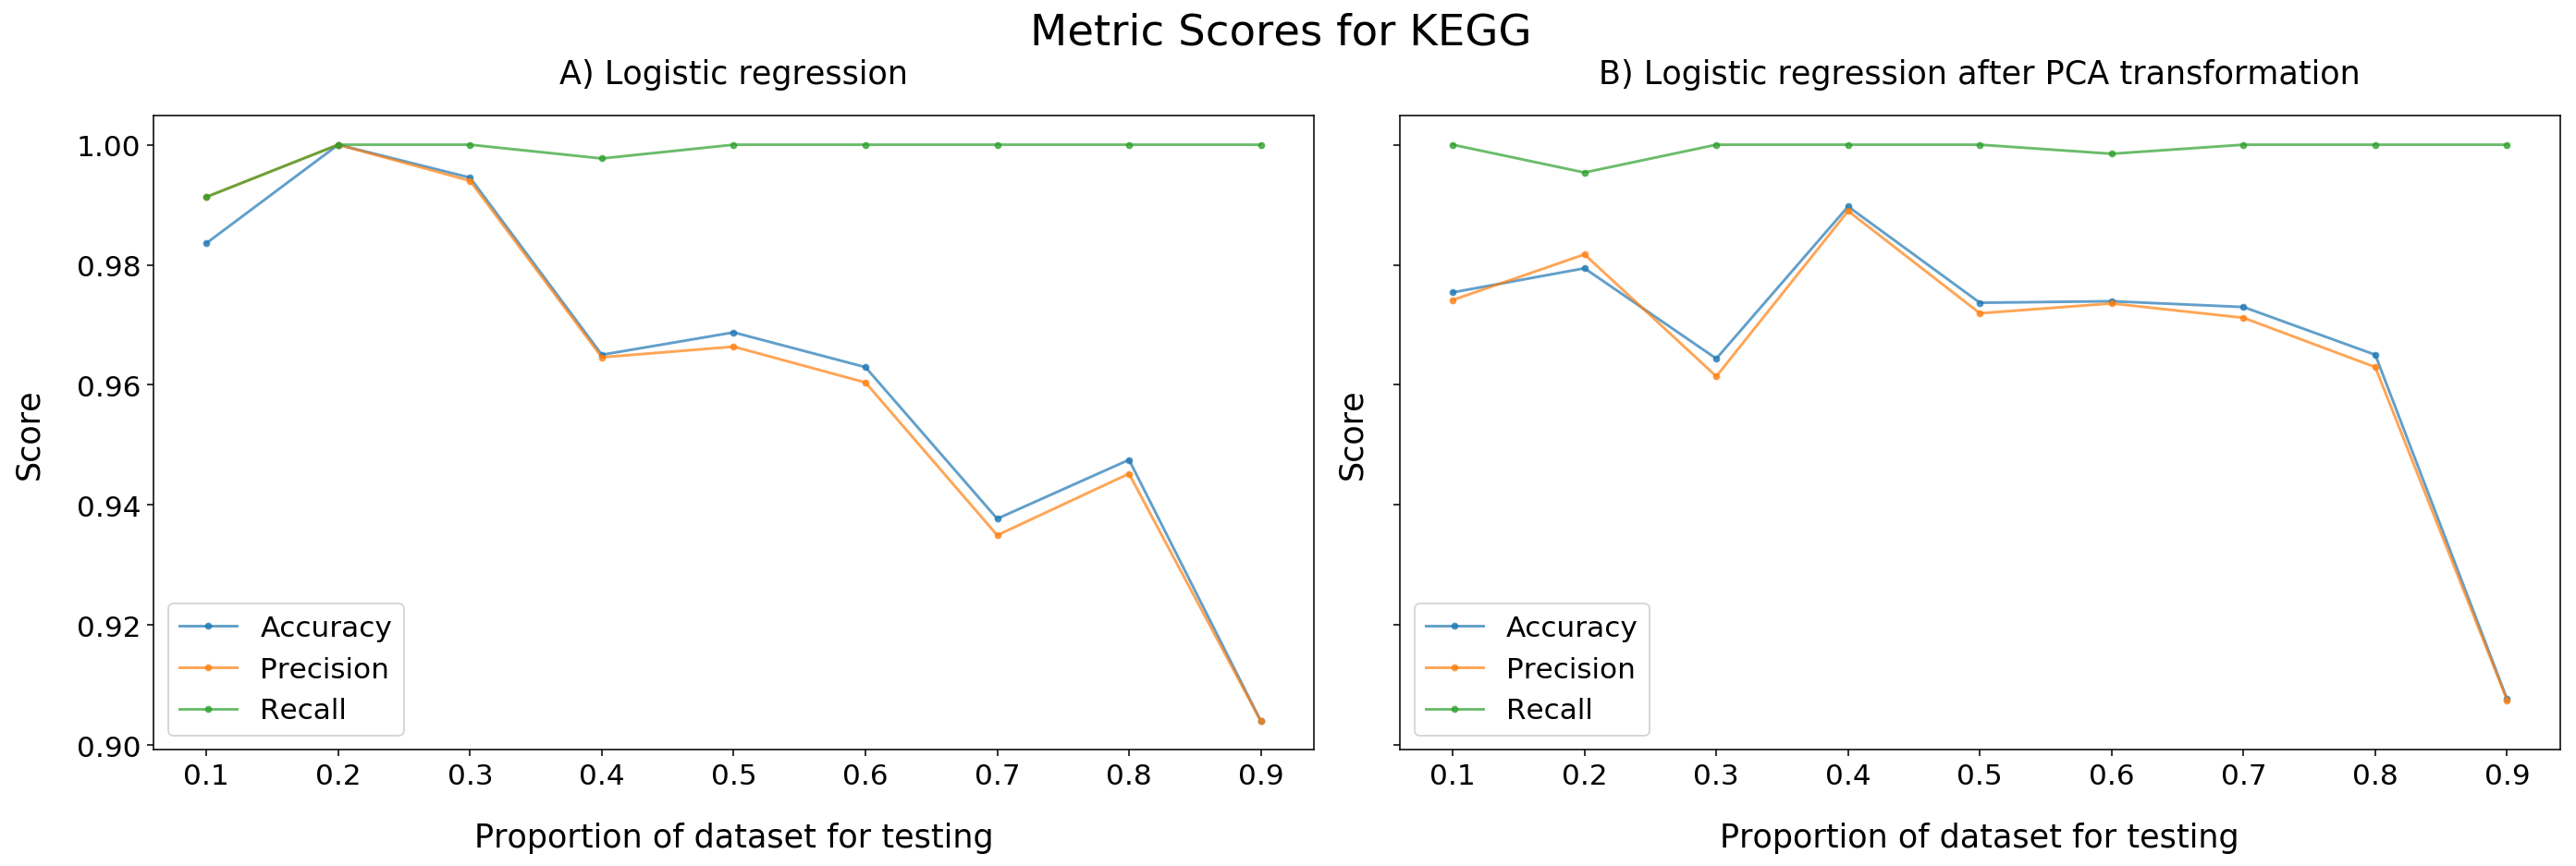

In [26]:
plot_metrics(kegg_log_reg, kegg_pca_log_reg, test_sizes, 'KEGG')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

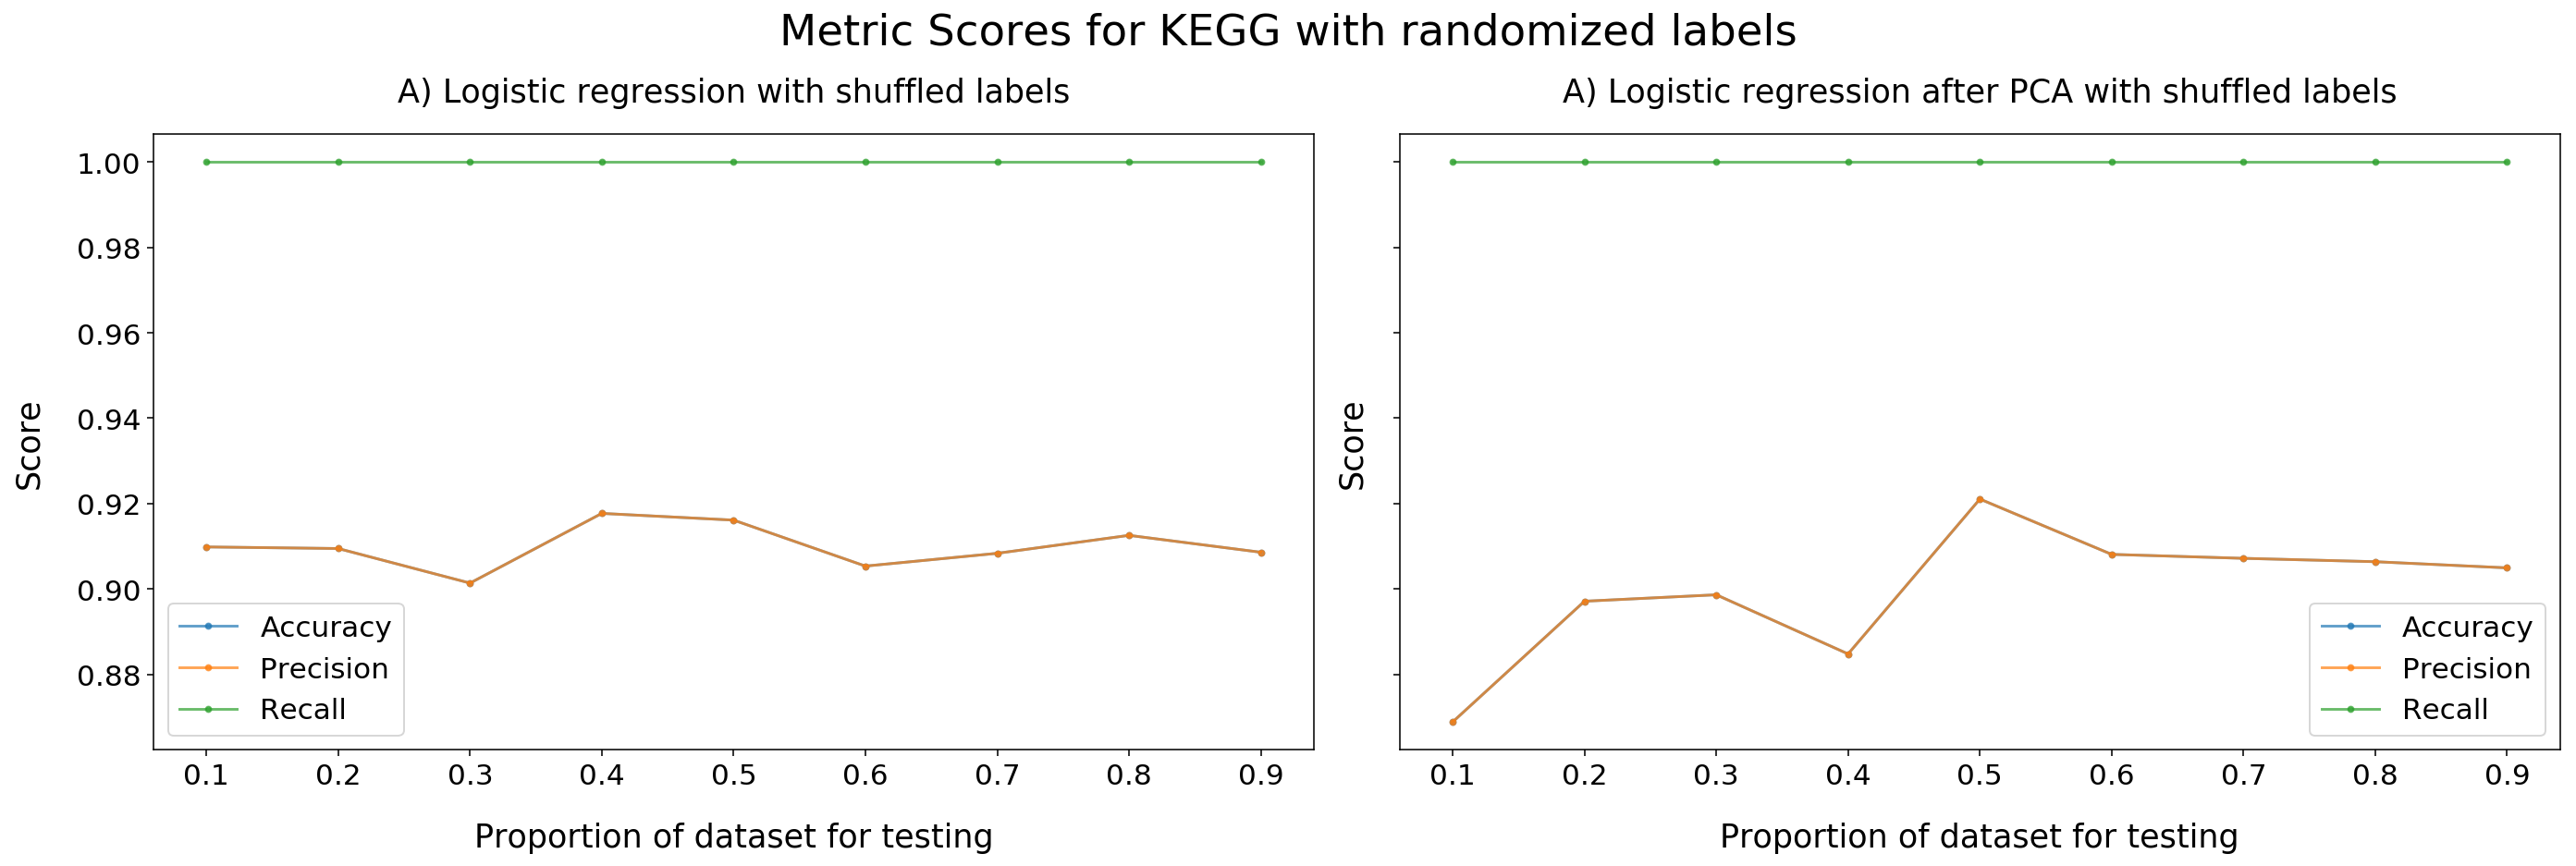

In [27]:
plot_metrics(kegg_permutate_log_reg, kegg_permutate_pca_log_reg, test_sizes, 'KEGG', permutation=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

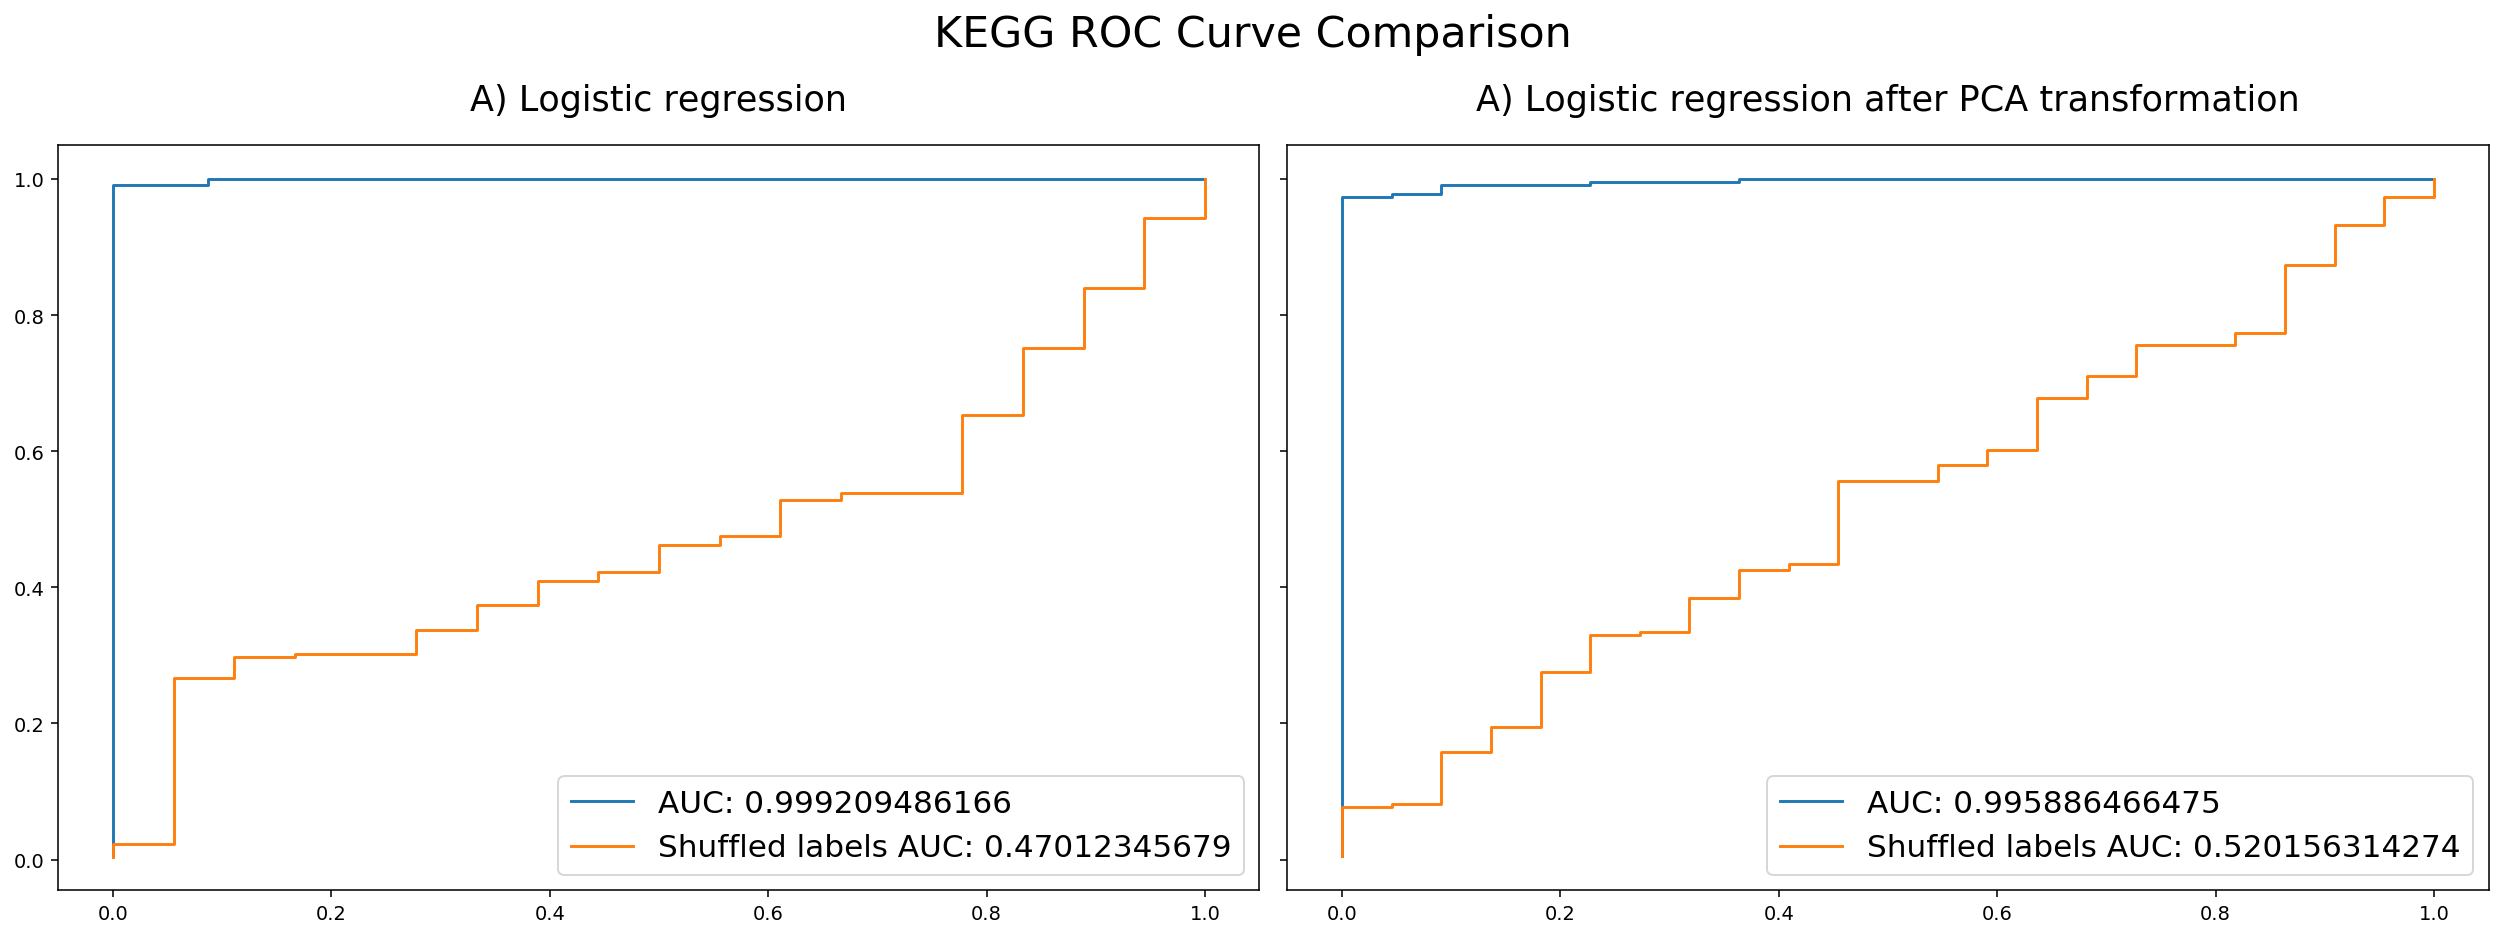

In [28]:
fig, (lax, rax) = plt.subplots(1, 2, figsize=(18, 7), dpi=140, sharey=True)
fig.suptitle('KEGG ROC Curve Comparison', fontsize=22)
ax = plt.gca()

"""Figure a)"""
lax.set_title('A) Logistic regression', fontsize=18, pad=18)
lax.plot(kegg_fpr, kegg_tpr, label="AUC: " + str(kegg_auc))
lax.plot(kegg_fpr_permutate, kegg_tpr_permutate, label="Shuffled labels AUC: " + str(kegg_auc_permutate))
lax.legend(loc=4, prop={'size': 16})   

"""Figure b)"""
rax.set_title('A) Logistic regression after PCA transformation', fontsize=18, pad=18)
rax.plot(kegg_pca_fpr, kegg_pca_tpr, label="AUC: " + str(kegg_pca_auc))
rax.plot(kegg_pca_fpr_permutate, kegg_pca_tpr_permutate, label="Shuffled labels AUC: " + str(kegg_pca_auc_permutate))
rax.legend(loc=4, prop={'size': 16})
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

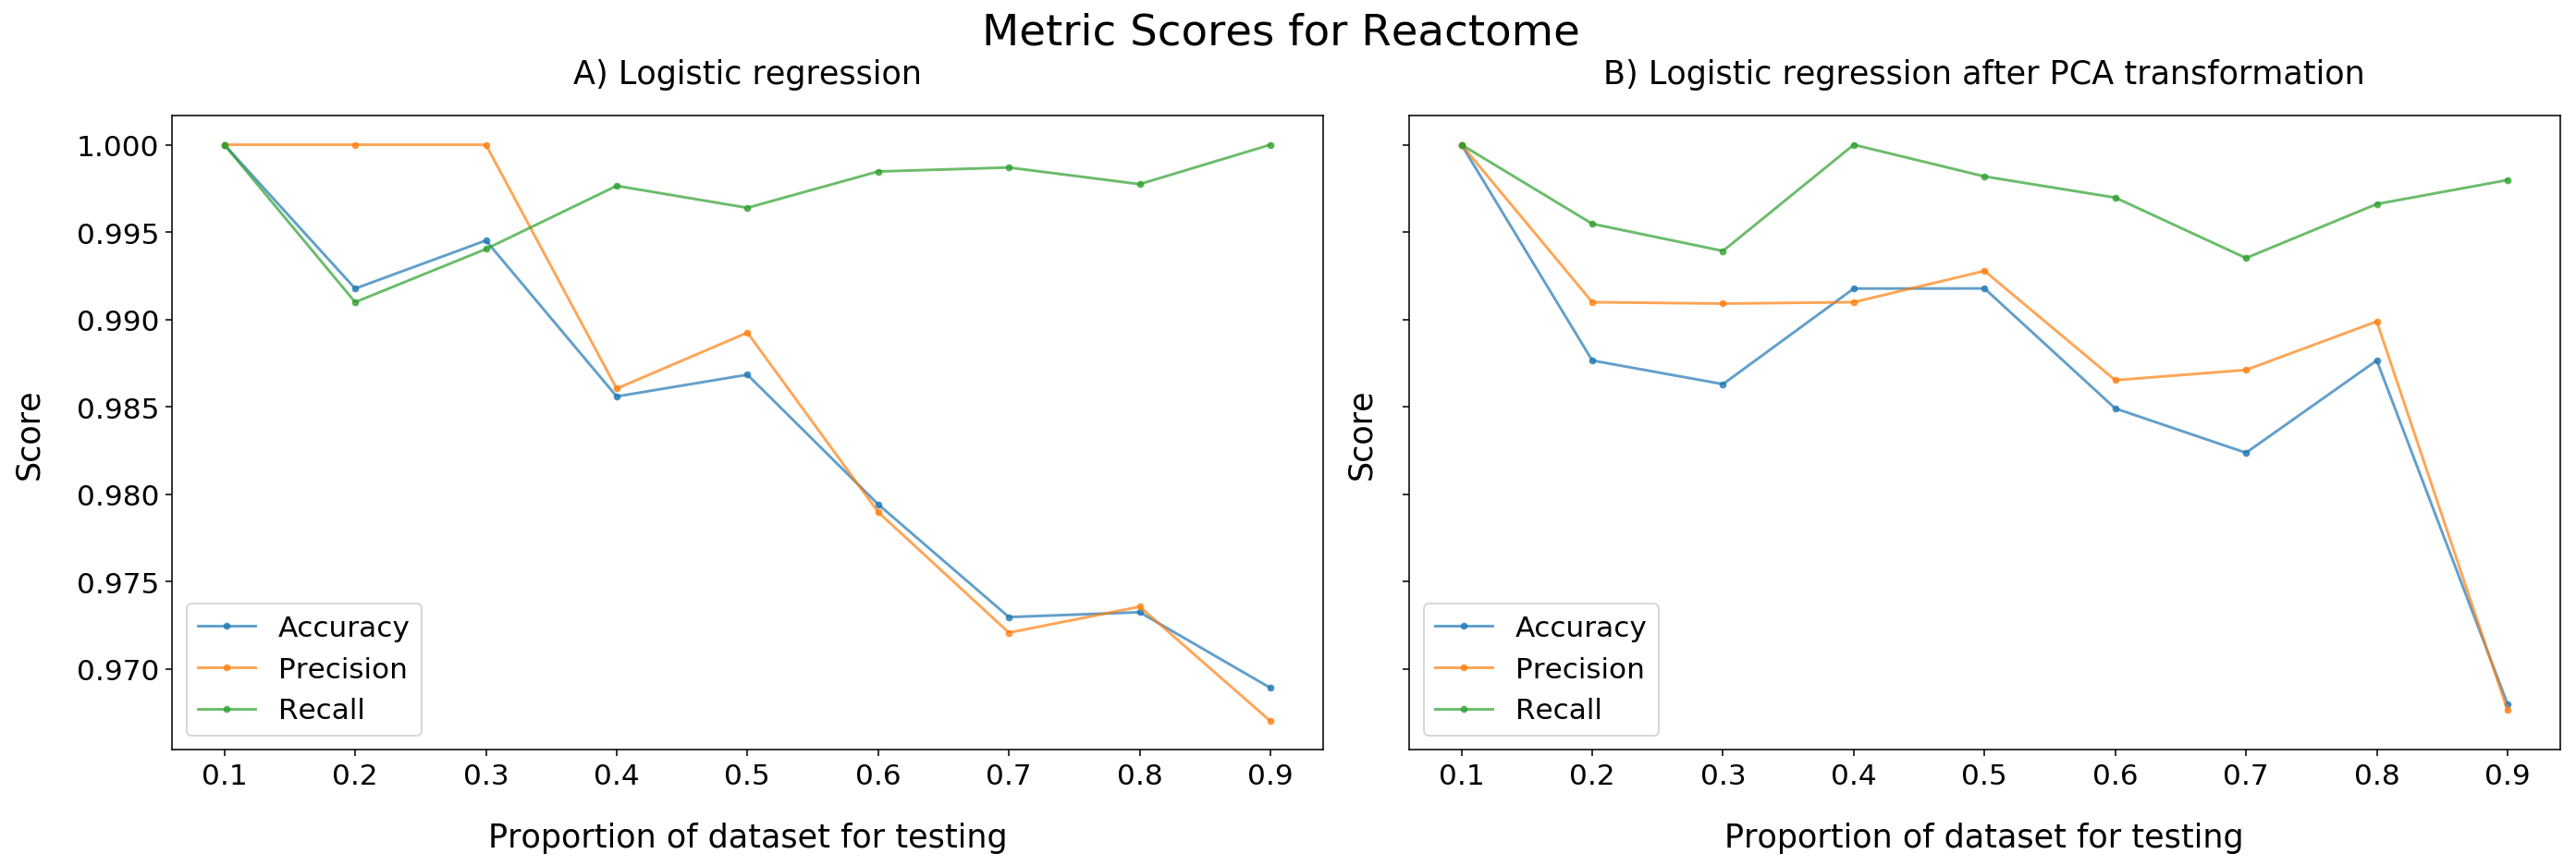

In [29]:
plot_metrics(reactome_log_reg, reactome_pca_log_reg, test_sizes, 'Reactome')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

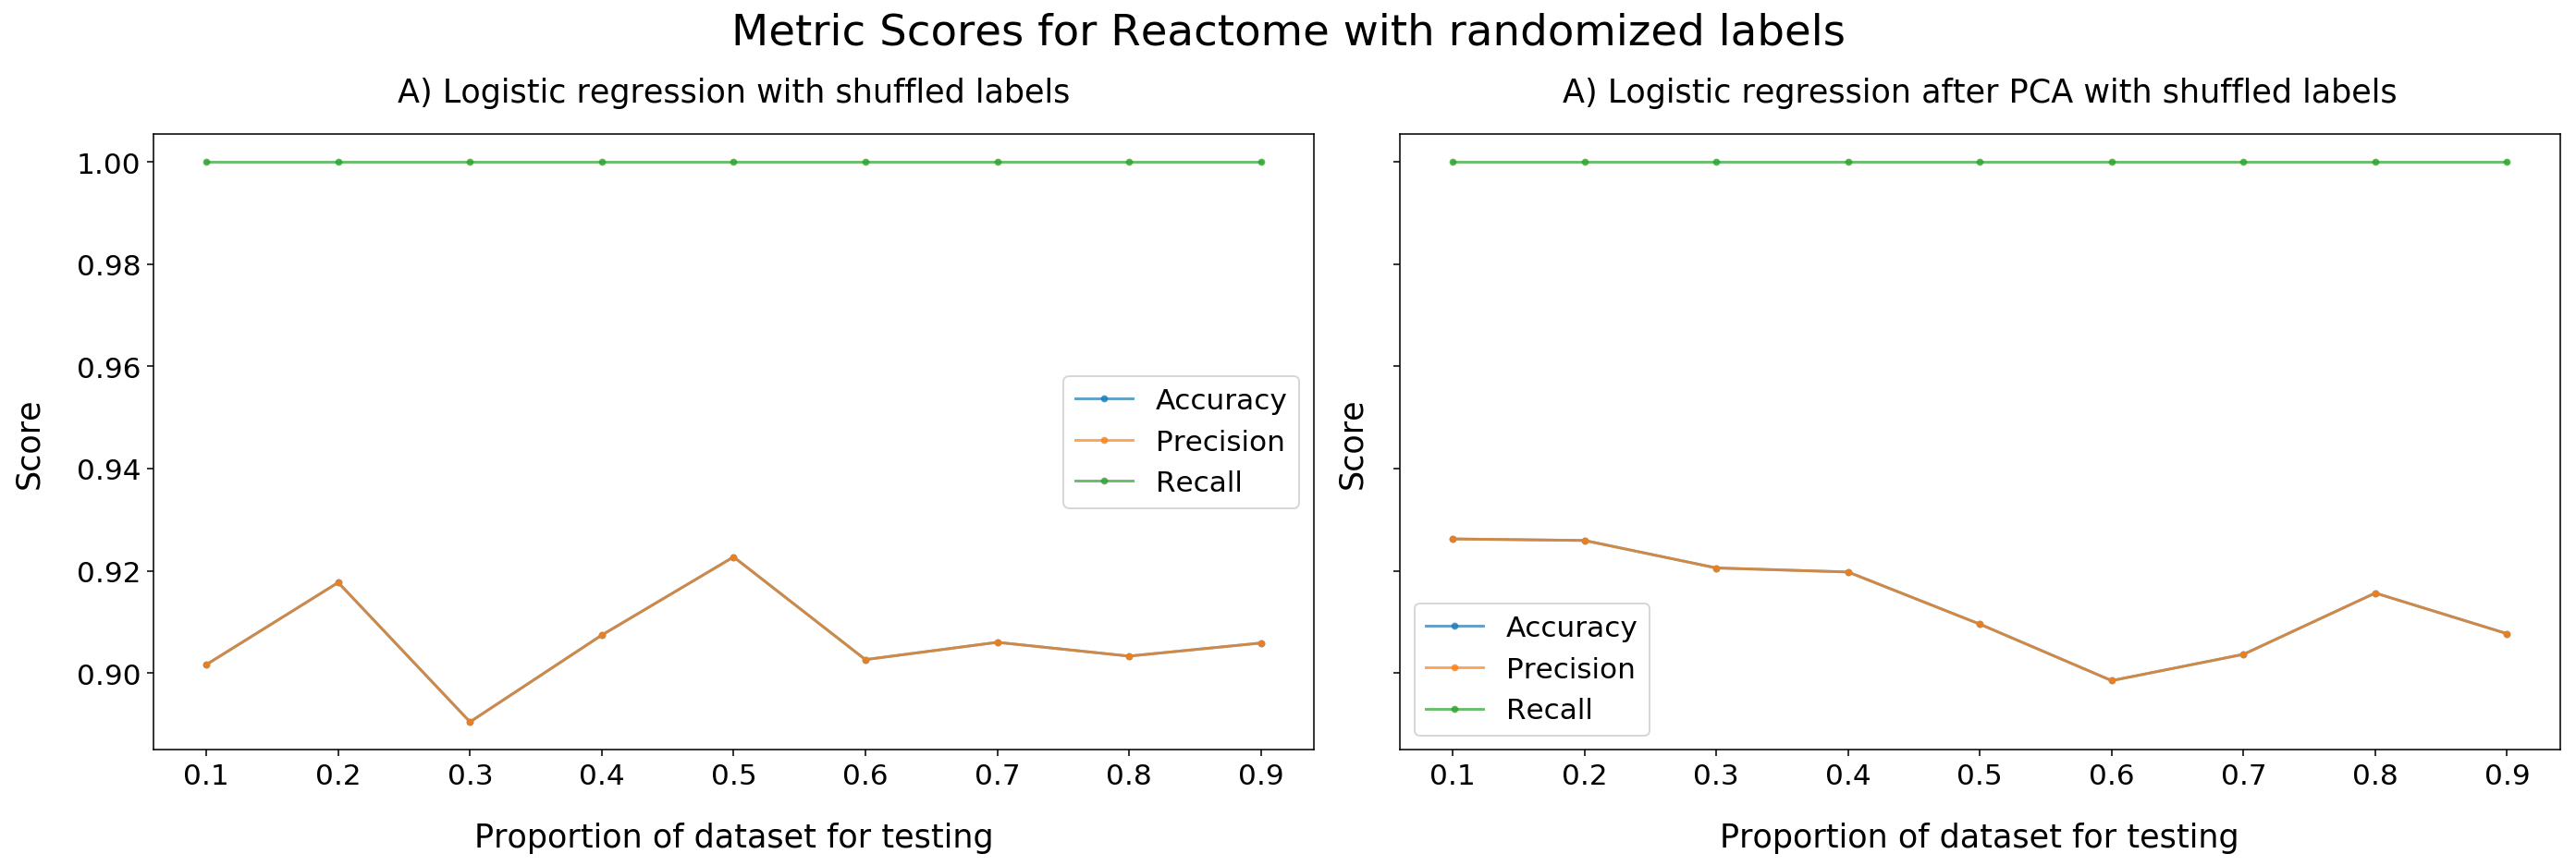

In [39]:
plot_metrics(reactome_permutate_log_reg, reactome_permutate_pca_log_reg, test_sizes, 'Reactome', permutation=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

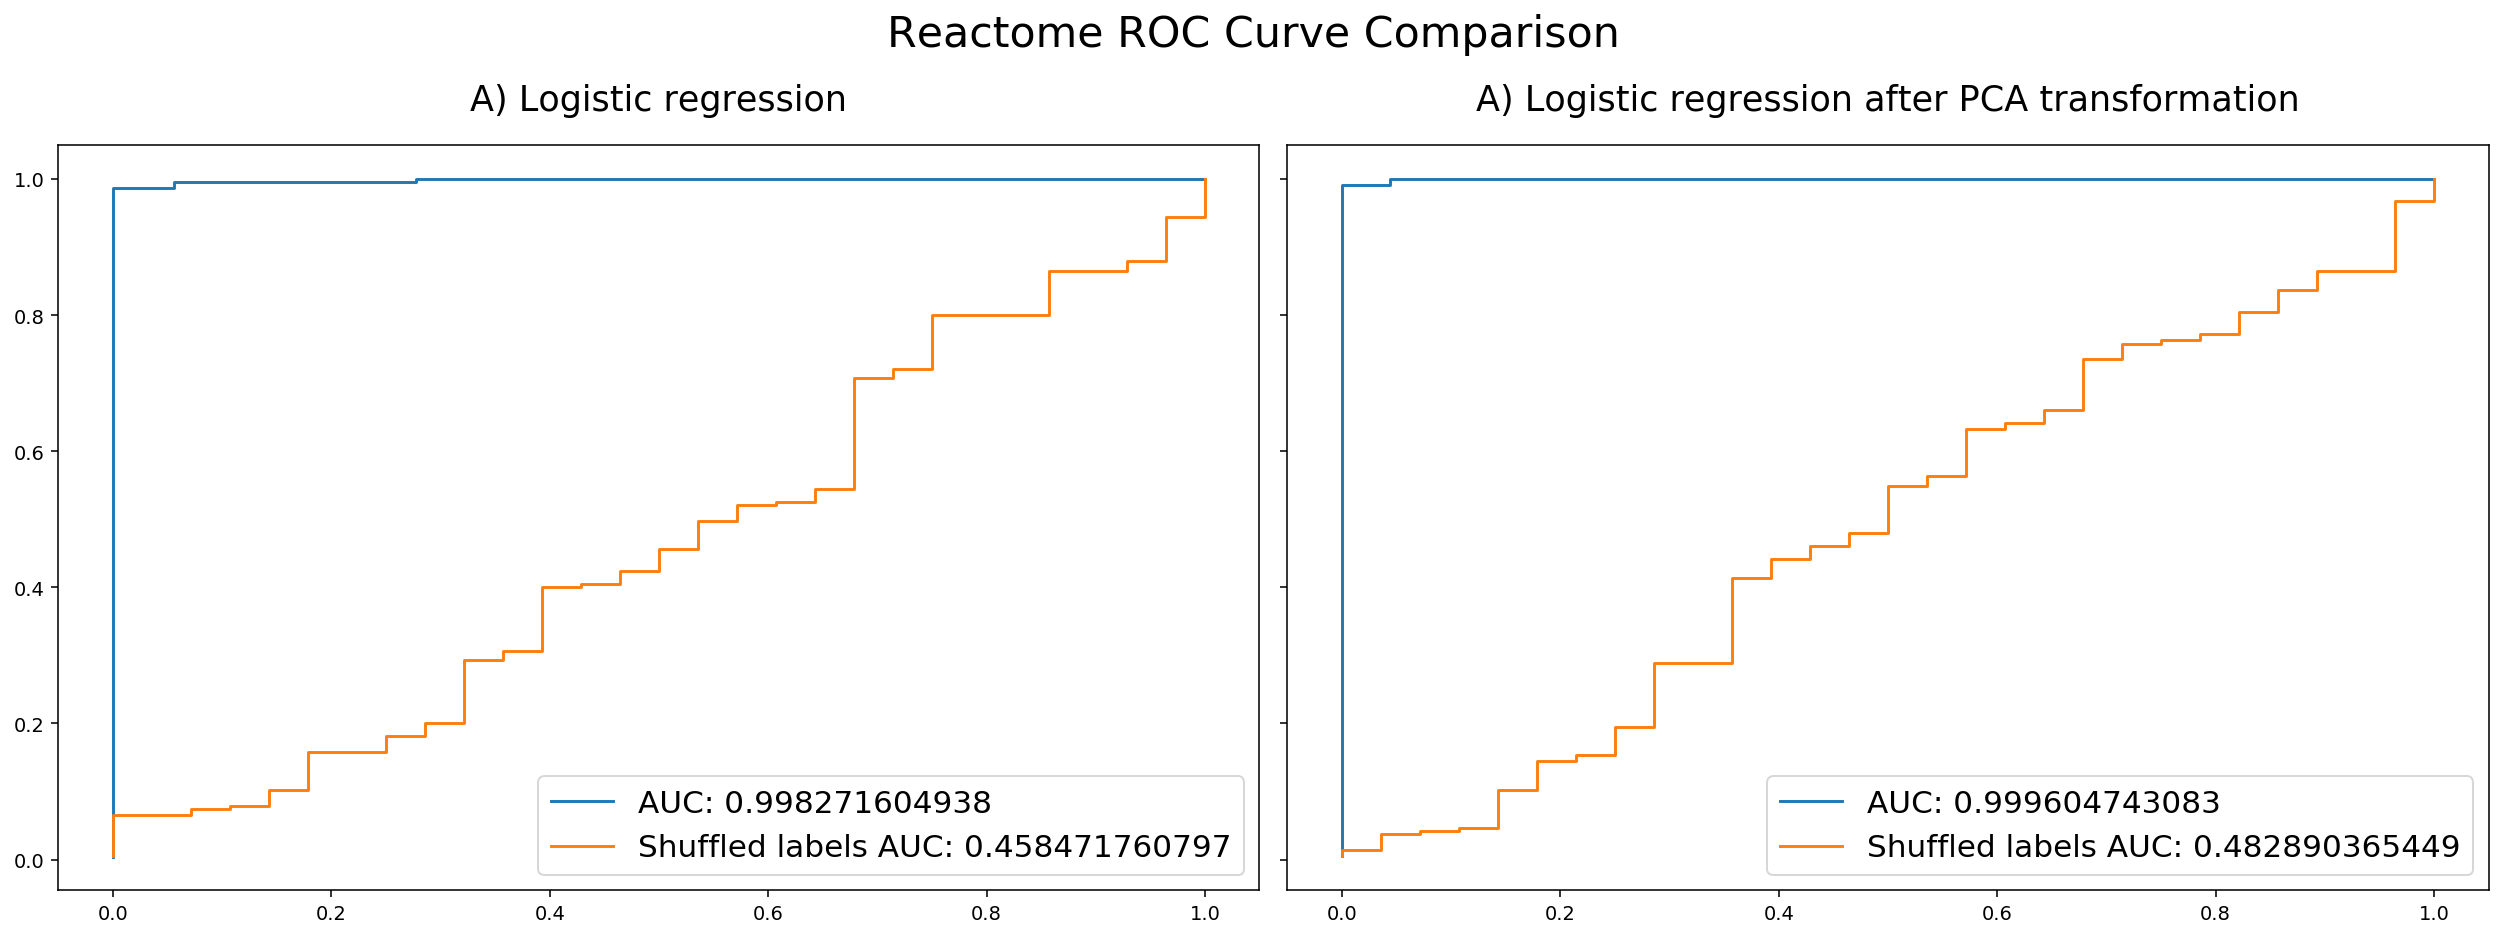

In [31]:
fig, (lax, rax) = plt.subplots(1, 2, figsize=(18, 7), dpi=140, sharey=True)
fig.suptitle('Reactome ROC Curve Comparison', fontsize=22)
ax = plt.gca()

"""Figure a)"""
lax.set_title('A) Logistic regression', fontsize=18, pad=18)
lax.plot(reactome_fpr, reactome_tpr, label="AUC: " + str(reactome_auc))
lax.plot(reactome_fpr_permutate, reactome_tpr_permutate, label="Shuffled labels AUC: " + str(reactome_auc_permutate))
lax.legend(loc=4, prop={'size': 16})   

"""Figure b)"""
rax.set_title('A) Logistic regression after PCA transformation', fontsize=18, pad=18)
rax.plot(reactome_pca_fpr, reactome_pca_tpr, label="AUC: " + str(reactome_pca_auc))
rax.plot(reactome_pca_fpr_permutate, reactome_pca_tpr_permutate, label="Shuffled labels AUC: " + str(reactome_pca_auc_permutate))
rax.legend(loc=4, prop={'size': 16})
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

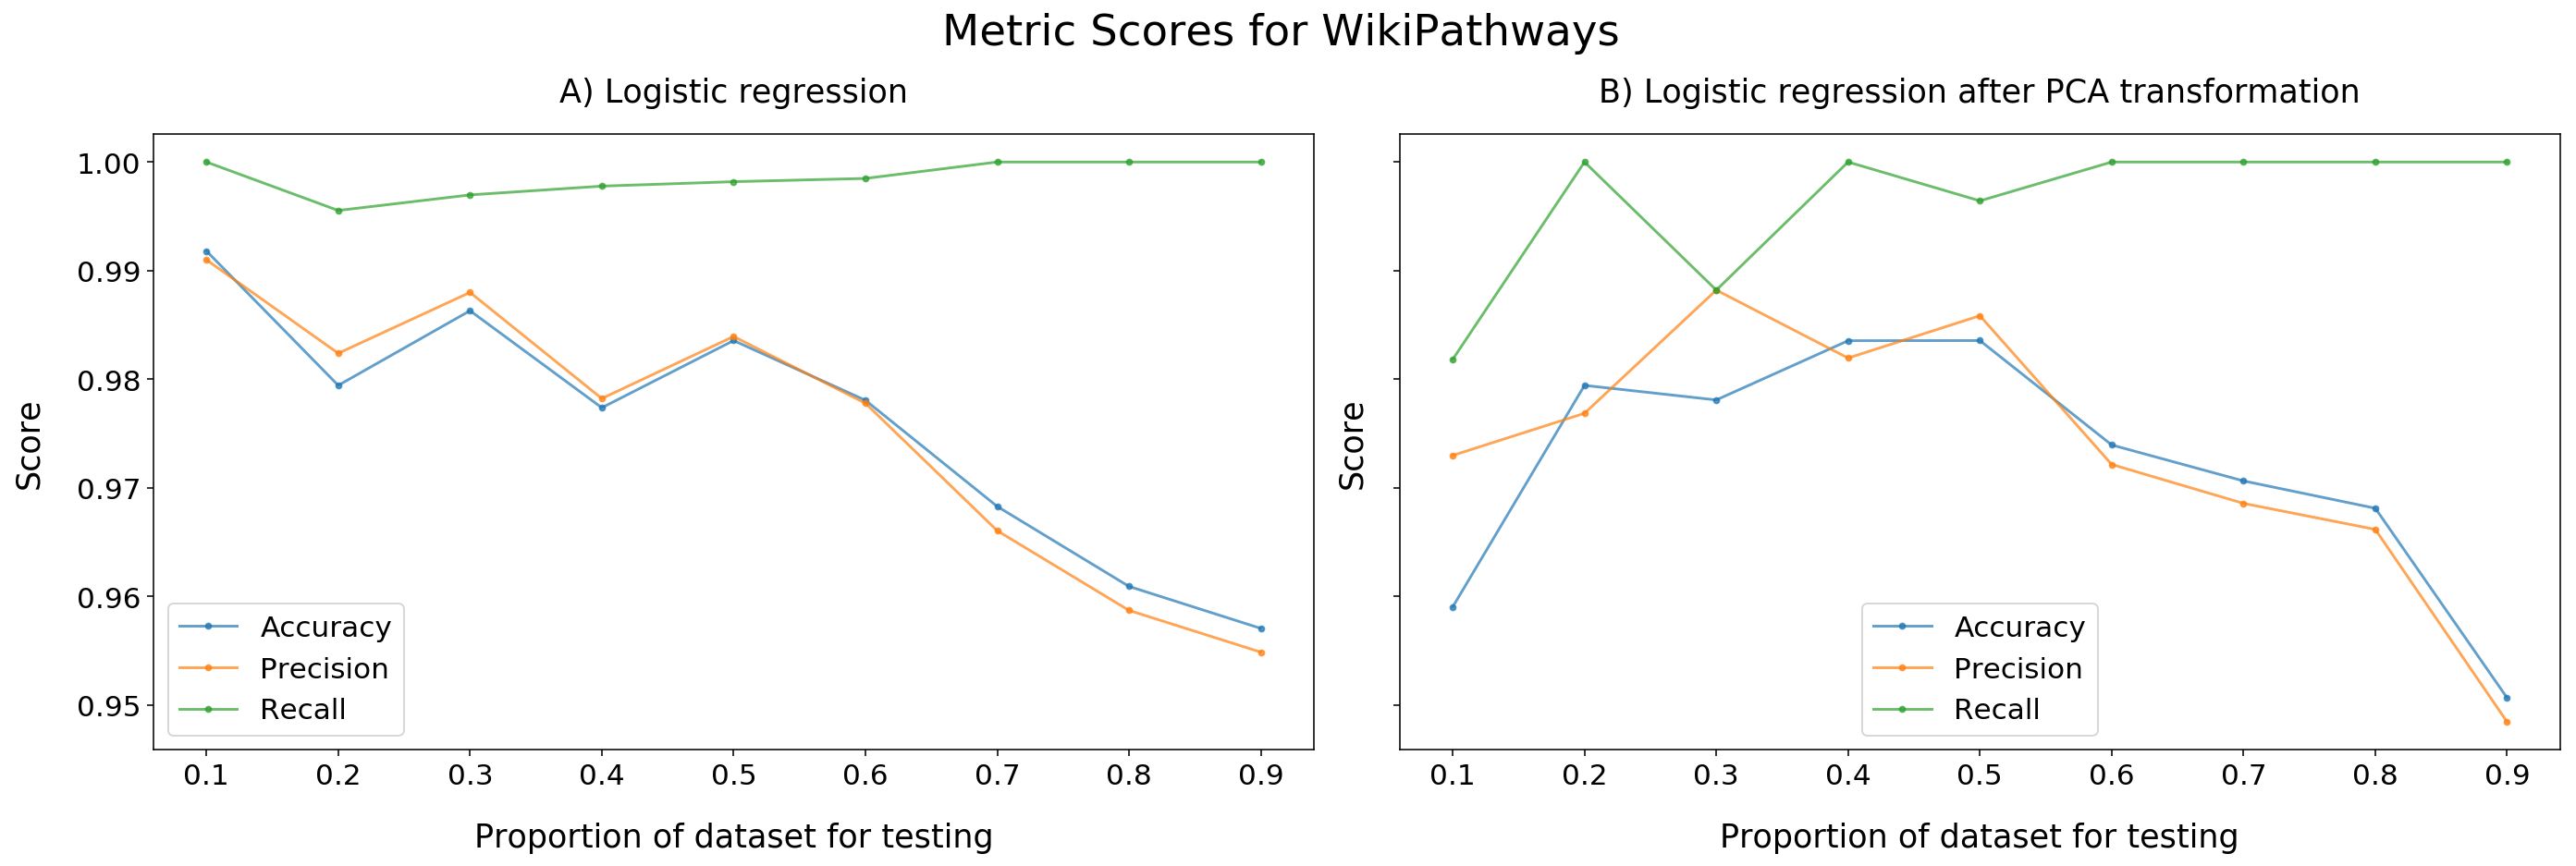

In [32]:
plot_metrics(wikipathways_log_reg, wikipathways_pca_log_reg, test_sizes, 'WikiPathways')
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

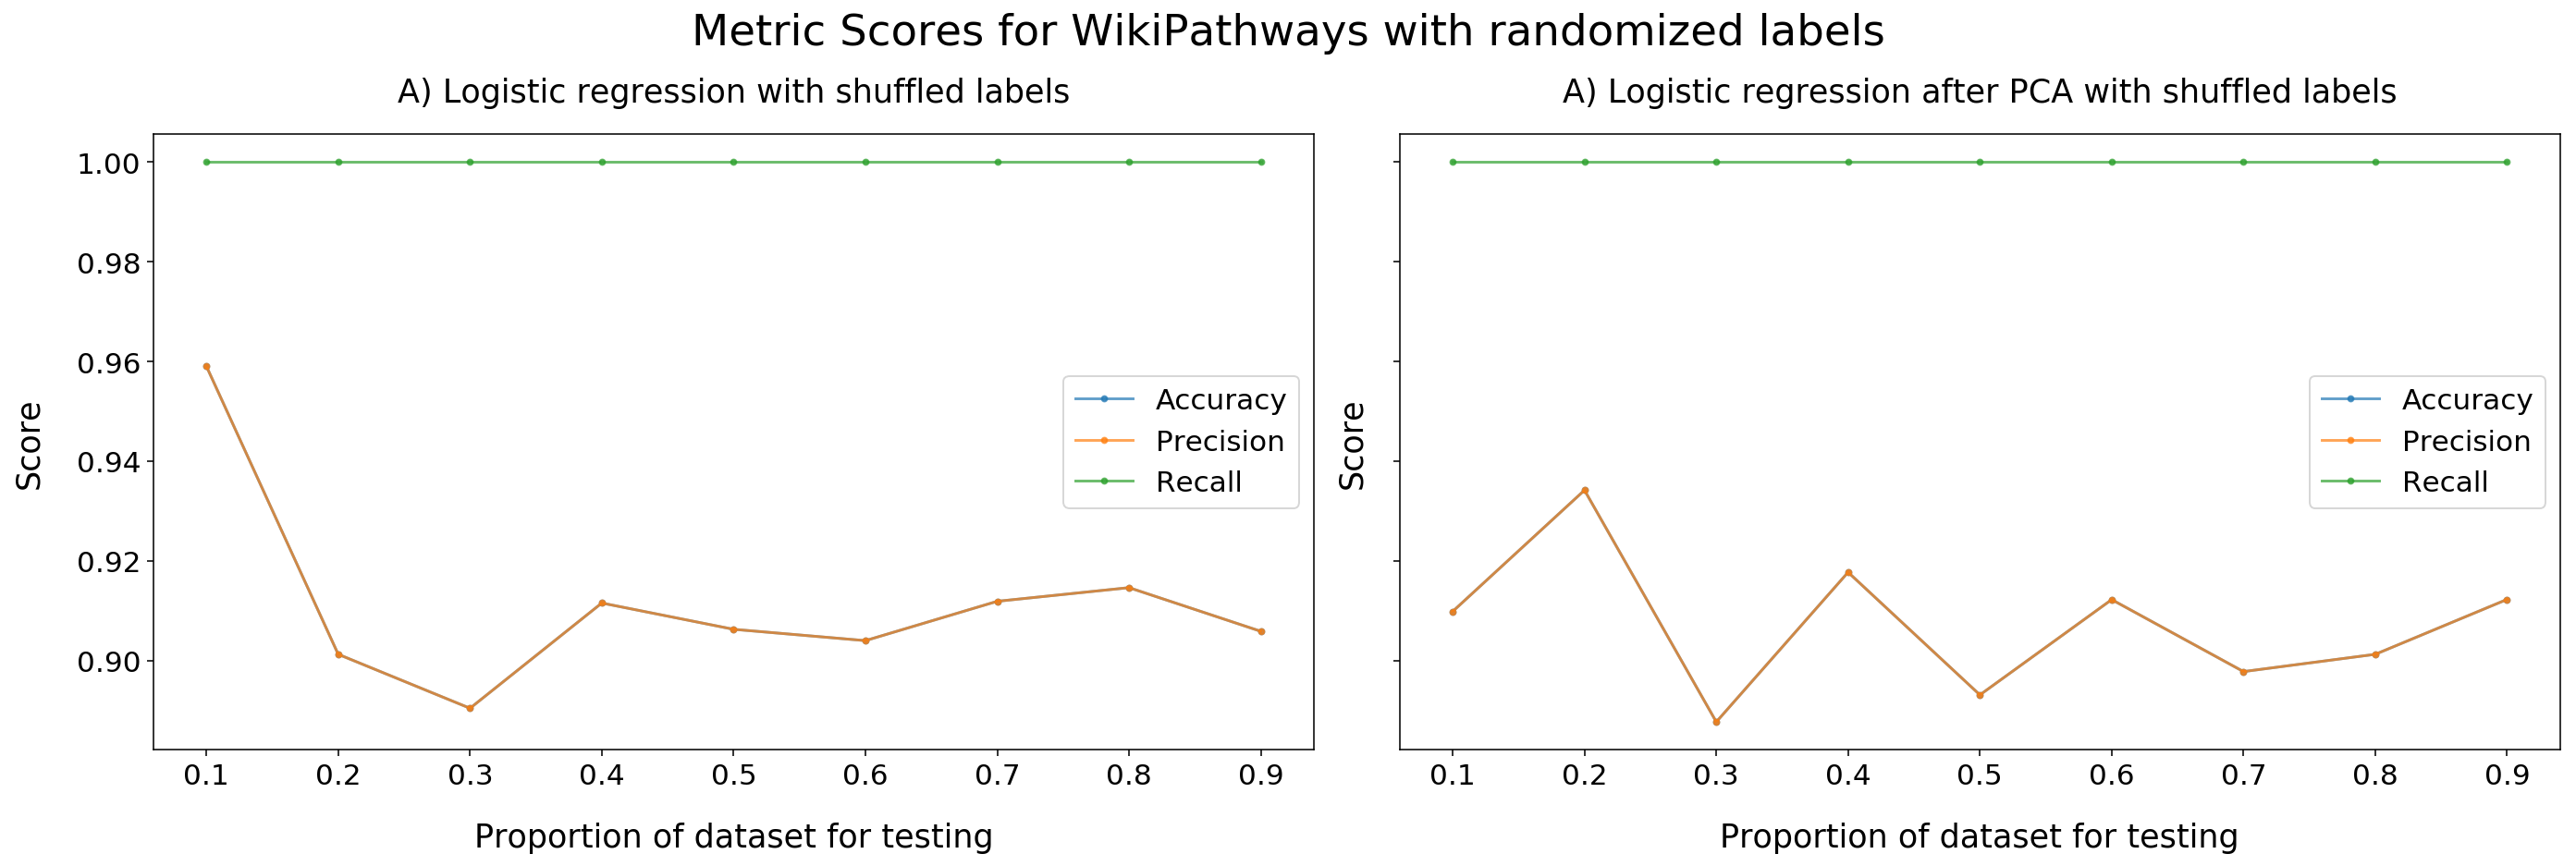

In [33]:
plot_metrics(wikipathways_permutate_log_reg, wikipathways_permutate_pca_log_reg, test_sizes, 'WikiPathways', permutation=True)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

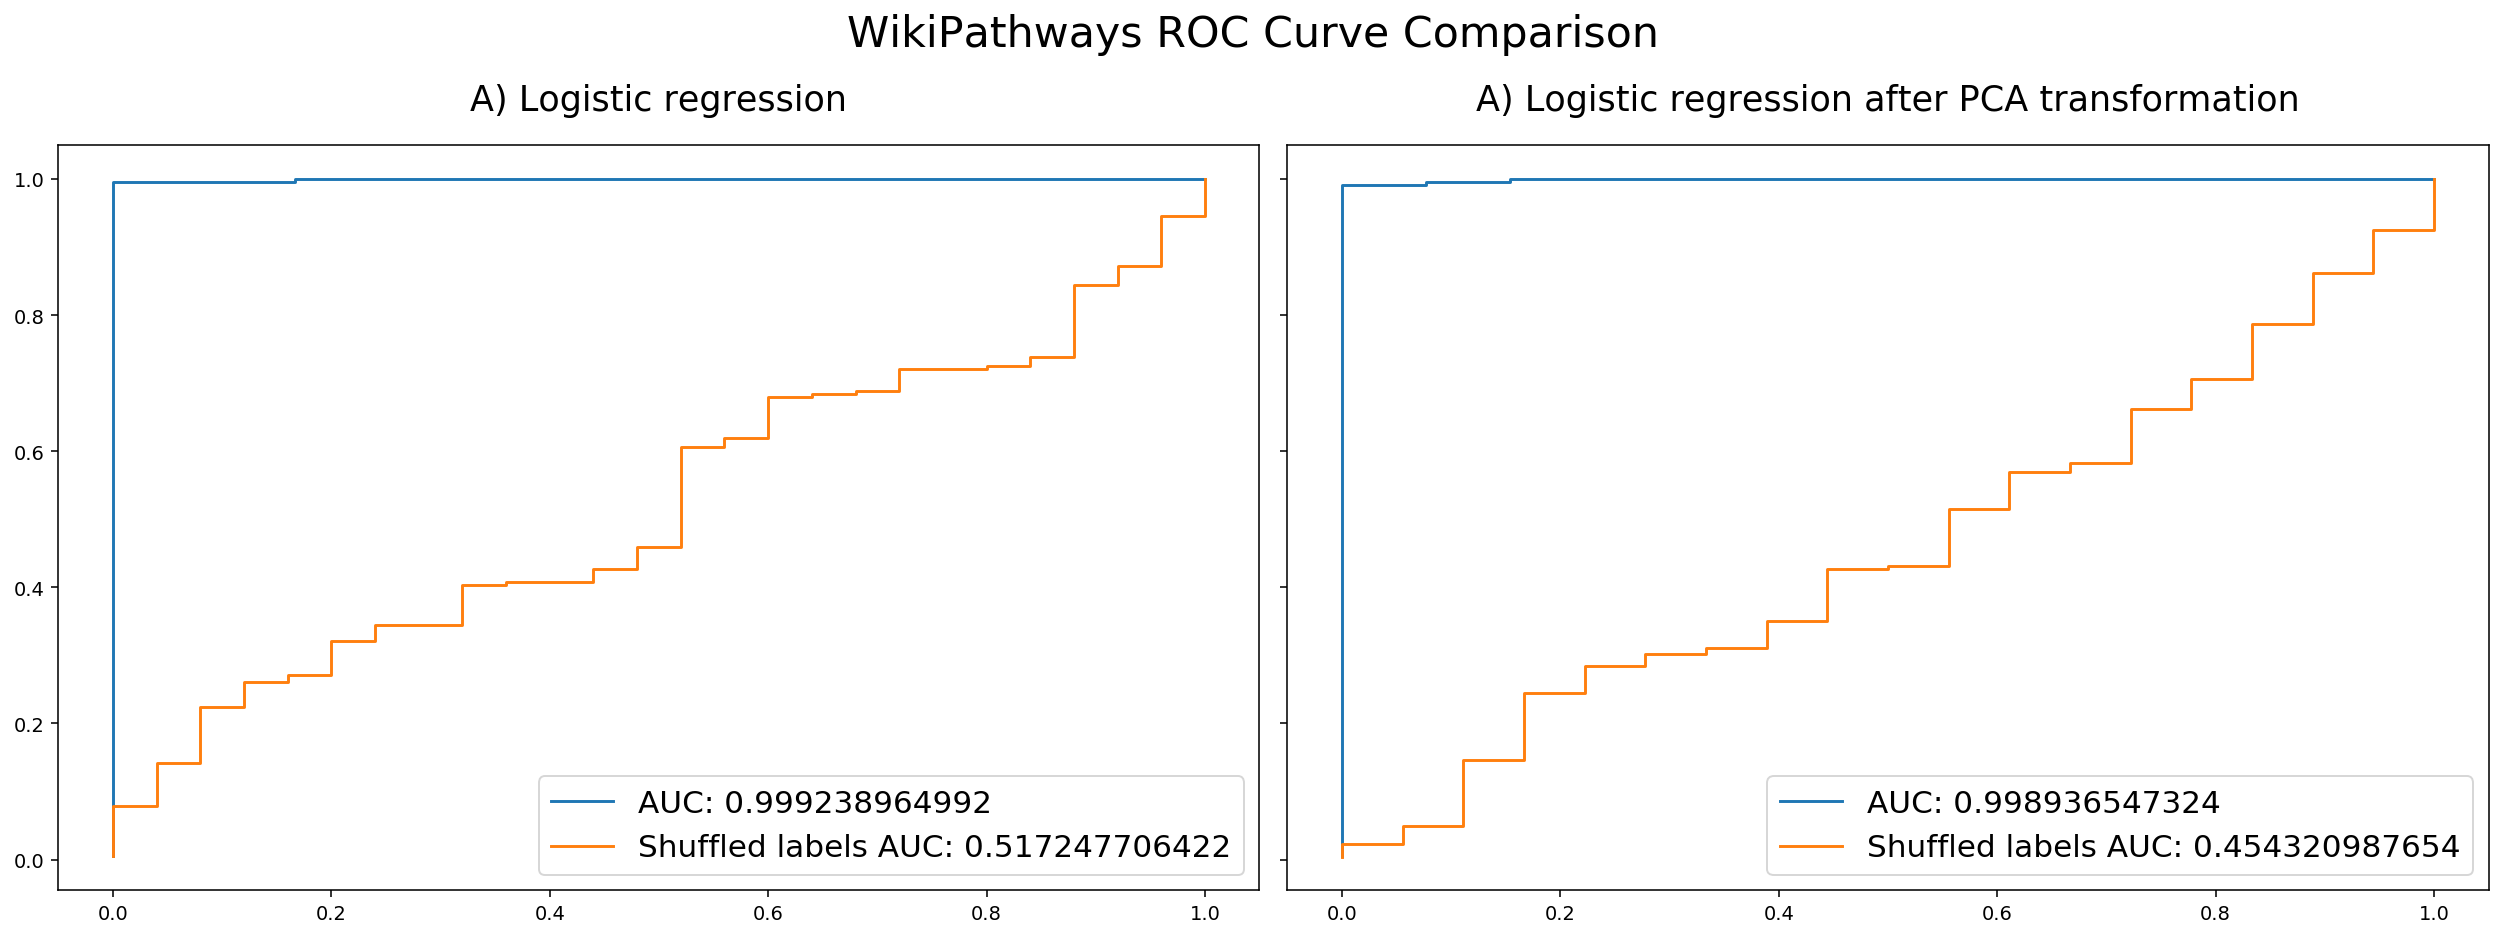

In [34]:
fig, (lax, rax) = plt.subplots(1, 2, figsize=(18, 7), dpi=140, sharey=True)
fig.suptitle('WikiPathways ROC Curve Comparison', fontsize=22)
ax = plt.gca()

"""Figure a)"""
lax.set_title('A) Logistic regression', fontsize=18, pad=18)
lax.plot(wikipathways_fpr, wikipathways_tpr, label="AUC: " + str(wikipathways_auc))
lax.plot(wikipathways_fpr_permutate, wikipathways_tpr_permutate, label="Shuffled labels AUC: " + str(wikipathways_auc_permutate))
lax.legend(loc=4, prop={'size': 16})   

"""Figure b)"""
rax.set_title('A) Logistic regression after PCA transformation', fontsize=18, pad=18)
rax.plot(wikipathways_pca_fpr, wikipathways_pca_tpr, label="AUC: " + str(wikipathways_pca_auc))
rax.plot(wikipathways_pca_fpr_permutate, wikipathways_pca_tpr_permutate, label="Shuffled labels AUC: " + str(wikipathways_pca_auc_permutate))
rax.legend(loc=4, prop={'size': 16})
plt.tight_layout(rect=[0, 0.03, 1, 0.93])

In [35]:
#plot_metrics(merged_log_reg, merged_pca_log_reg, test_sizes, 'Merged')
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [36]:
#plot_metrics(merged_permutate_log_reg, merged_permutate_pca_log_reg, test_sizes, 'Merged', permutation=True)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [37]:
# fig, (lax, rax) = plt.subplots(1, 2, figsize=(18, 7), dpi=140, sharey=True)
# fig.suptitle('Merged ROC Curve Comparison', fontsize=22)
# ax = plt.gca()

# """Figure a)"""
# lax.set_title('A) Logistic regression', fontsize=18, pad=18)
# lax.plot(merged_fpr, merged_tpr, label="AUC: " + str(merged_auc))
# lax.plot(merged_fpr_permutate, merged_tpr_permutate, label="Shuffled labels AUC: " + str(merged_auc_permutate))
# lax.legend(loc=4, prop={'size': 16})   

# """Figure b)"""
# rax.set_title('A) Logistic regression after PCA transformation', fontsize=18, pad=18)
# rax.plot(merged_pca_fpr, merged_pca_tpr, label="AUC: " + str(merged_pca_auc))
# rax.plot(merged_pca_fpr_permutate, merged_pca_tpr_permutate, label="Shuffled labels AUC: " + str(merged_pca_auc_permutate))
# rax.legend(loc=4, prop={'size': 16})
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [38]:
# controls + cases (shuffle cases) -> then compare (also test which is best proportion)